In [18]:
import torch
from transformers import AutoTokenizer
from data_utils import NewsDataset

from torch.utils.data import DataLoader

import argparse

from model import Transformer, CustomBertForClassification

from torch.utils.data import Dataset, DataLoader

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from inference import predict, load_model, load_tokenizer, index_to_category

In [3]:
train_batch_size=32
eval_batch_size = 100
accumulation_steps = 150

train_test_split = [0.8, 0.2]
val_test_split = [0.5, 0.5]
epochs = 100
device='cuda'

model_path='weights_final_81_acc.pt'

In [4]:
if device == 'cuda':
    assert torch.cuda.is_available()

tokenizer = load_tokenizer()
model = load_model(model_path, tokenizer).to(device)


from torch.utils.data import DataLoader
ds = NewsDataset('data.json')

generator = torch.Generator().manual_seed(42)
train_data, test_data = torch.utils.data.random_split(ds, train_test_split,generator=generator)
val_data, test_data = torch.utils.data.random_split(test_data, val_test_split,generator=generator)

dataloader = DataLoader(test_data, batch_size=eval_batch_size,
                        shuffle=False, num_workers=0)


preds = predict(model, tokenizer, dataloader, device)#15m

categorical_preds  = [index_to_category[idx] for idx in preds]
print(categorical_preds)

/home/valeriy/python_projects/news-category-prediction/data_utils.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.headline[data['headline'].apply(len) == 0] = 'absent'
/home/valeriy/python_projects/news-category-prediction/data_uti

['BLACK VOICES', 'WOMEN', 'BLACK VOICES', 'WELLNESS', 'POLITICS', 'PARENTING', 'POLITICS', 'TASTE', 'POLITICS', 'THE WORLDPOST', 'PARENTS', 'STYLE & BEAUTY', 'CRIME', 'WORLDPOST', 'WORLD NEWS', 'TRAVEL', 'GREEN', 'WORLDPOST', 'PARENTING', 'HEALTHY LIVING', 'WORLD NEWS', 'STYLE & BEAUTY', 'POLITICS', 'U.S. NEWS', 'WELLNESS', 'WOMEN', 'THE WORLDPOST', 'STYLE & BEAUTY', 'STYLE & BEAUTY', 'FOOD & DRINK', 'SCIENCE', 'HEALTHY LIVING', 'RELIGION', 'THE WORLDPOST', 'RELIGION', 'WORLD NEWS', 'POLITICS', 'ENTERTAINMENT', 'WELLNESS', 'PARENTING', 'PARENTS', 'WELLNESS', 'HOME & LIVING', 'ENTERTAINMENT', 'WELLNESS', 'WORLDPOST', 'GREEN', 'ENTERTAINMENT', 'RELIGION', 'ENTERTAINMENT', 'FOOD & DRINK', 'MONEY', 'WELLNESS', 'SPORTS', 'STYLE & BEAUTY', 'POLITICS', 'SCIENCE', 'POLITICS', 'PARENTING', 'WEDDINGS', 'WOMEN', 'POLITICS', 'ENVIRONMENT', 'WELLNESS', 'WELLNESS', 'HOME & LIVING', 'ENVIRONMENT', 'IMPACT', 'POLITICS', 'QUEER VOICES', 'ENTERTAINMENT', 'BLACK VOICES', 'WELLNESS', 'STYLE', 'TRAVEL', 'W

In [10]:
import numpy as np
labels = []
for v in dataloader:
    labels.append(v['y'])

labels = np.concatenate(labels)
labels = [index_to_category[idx] for idx in labels]

In [12]:
from sklearn.metrics import confusion_matrix

In [59]:

cm_original = confusion_matrix(labels, categorical_preds)

In [70]:

cm_norm = confusion_matrix(labels, categorical_preds, normalize='true')

<Axes: >

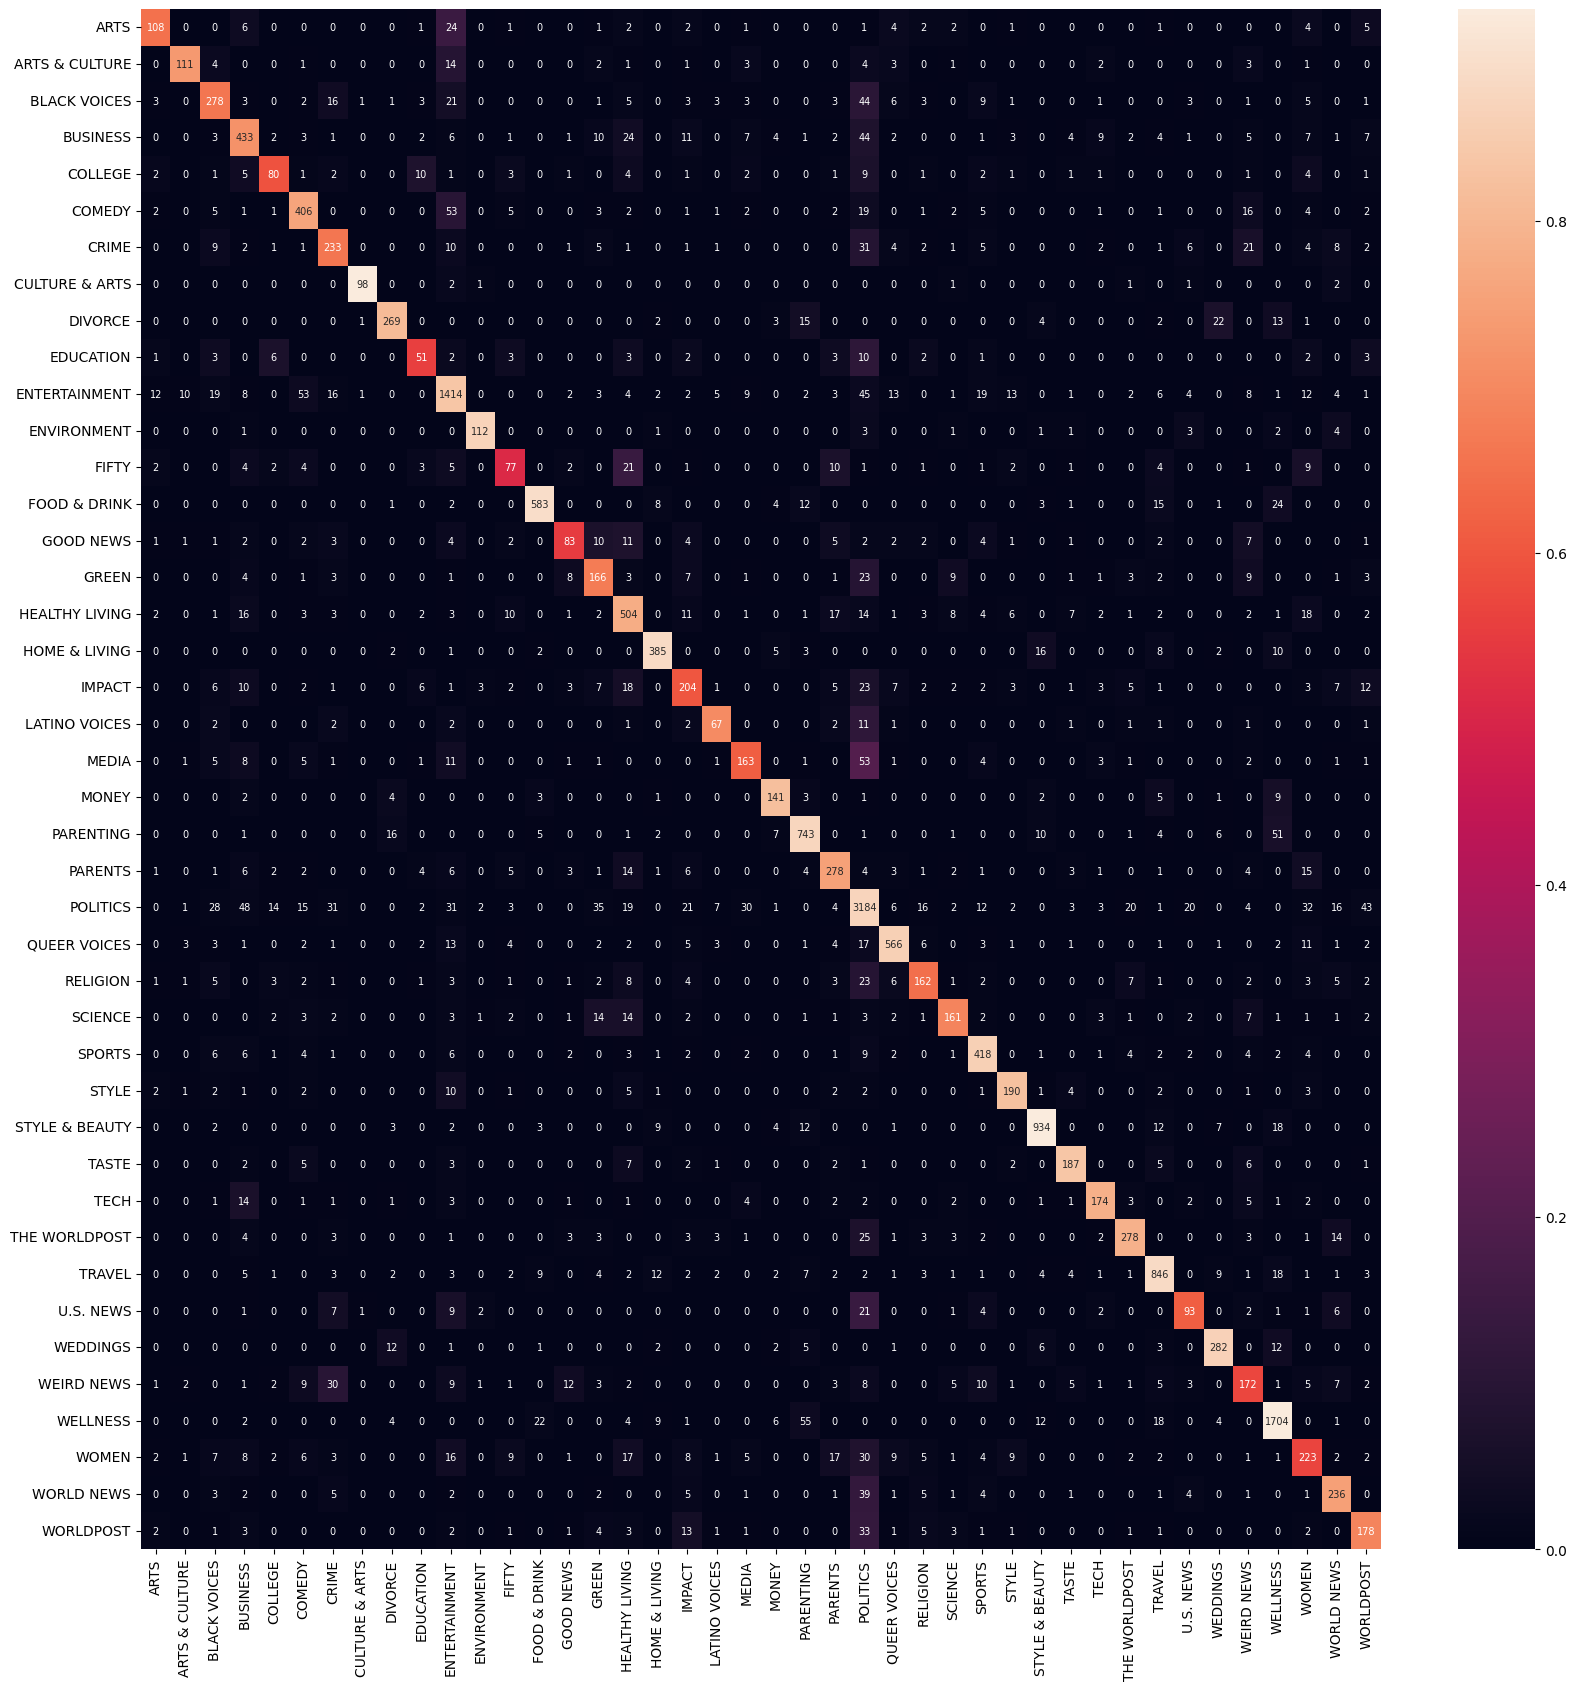

In [71]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cm_norm,
            ax=ax,
            annot=cm_original,
            fmt='d',
            annot_kws={"size": 7},
            xticklabels=np.unique(np.array(labels)),
            yticklabels=np.unique(np.array(labels)))